In [2]:
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
path_to_csv_file = os.getenv("PATH_TO_DATASET")

if not os.path.isfile(path_to_csv_file):
    print('not a file')

In [5]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 

In [6]:
df = pd.read_csv(path_to_csv_file)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [7]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [8]:
total_urls = len(df)
print(f'Number of total urls: {total_urls}')

number_of_types = df['type'].nunique()
print(f'Number of unique types: {number_of_types}')

types_count = df['type'].value_counts()
print(f'Type counts: {types_count}')

type_percentage = df['type'].value_counts(normalize=True) * 100
print(type_percentage.map('{:.2f}'.format))

Number of total urls: 651191
Number of unique types: 4
Type counts: type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64
type
benign        65.74
defacement    14.81
phishing      14.45
malware        4.99
Name: proportion, dtype: object


In [9]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

In [10]:
fig_bar = px.histogram(
    df,
    x='type',
    title='Number of URLs for each type',
    labels={'type': 'URL Type', 'count': 'Number of URLs'},
    color='type',
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig_bar.update_layout(
    xaxis_title='URL Type', 
    yaxis_title='Number of URLs',
    bargap=0.2
)

fig_bar.show()

In [11]:
df_phishing = df[df.type=='phishing']
df_phishing

,url,type
0,br-icloud.com.br,phishing
21,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing
28,http://www.marketingbyinternet.com/mo/e56508df...,phishing
40,https://docs.google.com/spreadsheet/viewform?f...,phishing
72,retajconsultancy.com,phishing
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [12]:
df_malware = df[df.type=='malware']
df_defacement = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [13]:
import re
from collections import Counter

In [14]:
def tokenize_url(url):
    tokens = re.split(r'[/\=-_.?&=:@]', url.lower())
    tokens = [token for token in tokens if token and len(token) > 2]
    return tokens

def get_top_words(df, columns='url', top_n=15):
    all_tokens = []
    
    for url in df[columns]:
        all_tokens.extend(tokenize_url(url))
    
    return Counter(all_tokens).most_common(top_n)

In [15]:
print("Top phishing words:")
print(get_top_words(df_phishing))

print("Top malware words:")
print(get_top_words(df_malware))

print("\nTop defacement words:")
print(get_top_words(df_defacement))

print("\nTop benign words:")
print(get_top_words(df_benign))

Top phishing words:
[('com', 55707), ('www', 37208), ('http', 18811), ('html', 18593), ('org', 9792), ('net', 7589), ('https', 7367), ('htm', 6687), ('php', 6174), ('index', 5900), ('login', 4372), ('edu', 3617), ('tools', 3314), ('ietf', 3219), ('battle', 1954)]
Top malware words:
[('http', 24636), ('com', 11561), ('https', 6764), ('exe', 6243), ('mozi', 4178), ('info', 4019), ('9779', 3984), ('www', 3075), ('uploads', 2974), ('mixh', 2881), ('mitsui-jyuku', 2879), ('css', 2214), ('php', 2199), ('bins', 1703), ('apbfiber', 1147)]

Top defacement words:
[('http', 96515), ('com', 79887), ('www', 67340), ('index', 57865), ('php', 51451), ('option', 40060), ('itemid', 34356), ('view', 32002), ('html', 27676), ('content', 24187), ('article', 21798), ('component', 16960), ('catid', 11718), ('tmpl', 11179), ('page', 9902)]

Top benign words:
[('com', 324132), ('html', 68200), ('org', 38754), ('http', 34856), ('net', 28352), ('php', 27789), ('htm', 26912), ('index', 18863), ('wiki', 17263), (

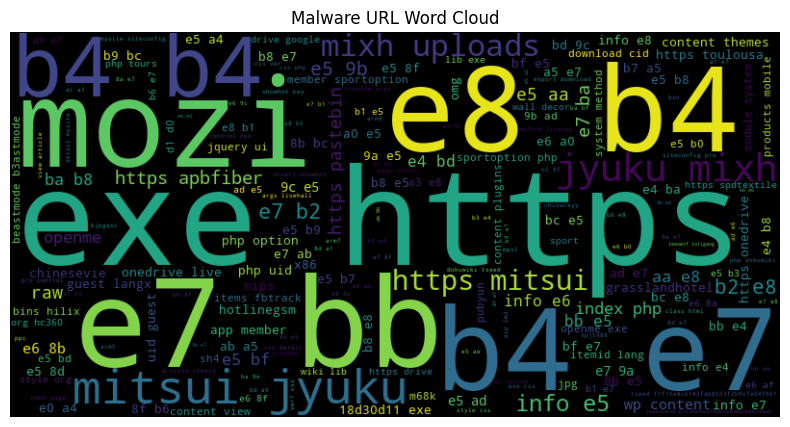

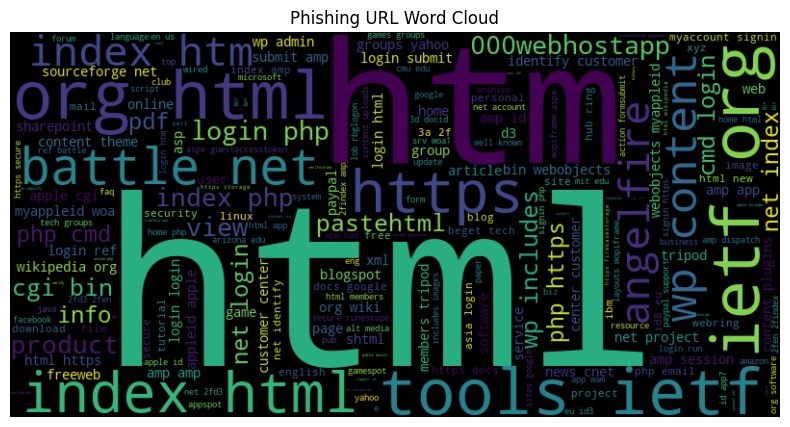

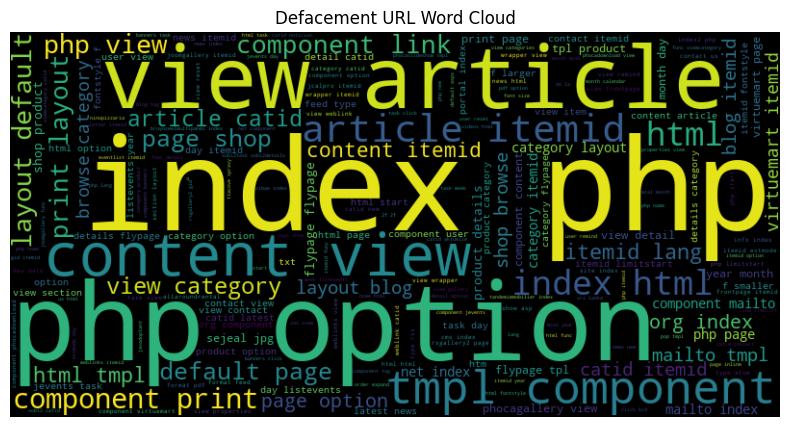

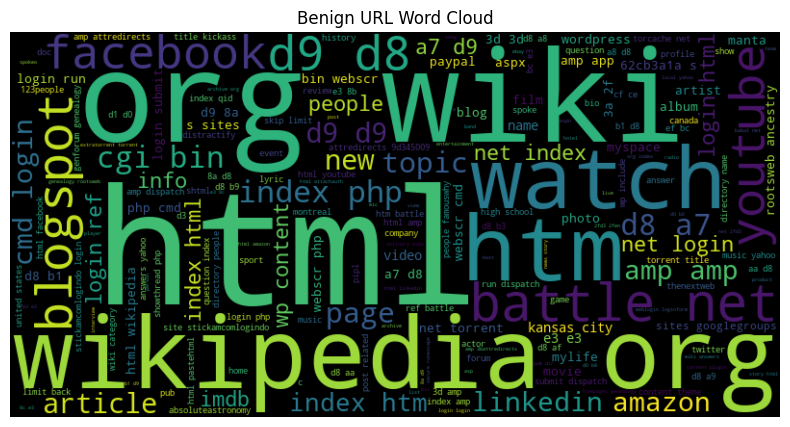

In [16]:
from wordcloud import WordCloud

def plot_wordcloud(df, title):
    all_text = ' '.join([' '.join(tokenize_url(url)) for url in df['url']])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df_malware, "Malware URL Word Cloud")
plot_wordcloud(df_phishing, "Phishing URL Word Cloud")
plot_wordcloud(df_defacement, "Defacement URL Word Cloud")
plot_wordcloud(df_benign, "Benign URL Word Cloud")


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [18]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['type'])
df

,url,type,label_encoded
0,br-icloud.com.br,phishing,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3


In [19]:
(df['label_encoded'].value_counts())

label_encoded
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [20]:
suspicious_keywords = [
    'login', 'signin', 'verify', 'update', 'banking', 'account',
    'secure', 'ebay', 'paypal', 'invoice', 'credentials',
    'password', 'confirm', 'webscr', 'security', 'submit',
    'redirect', 'authentication', 'download', 'free', 'bonus',
    'win', 'reset', 'access', 'click', 'alert', 'support'
]

In [21]:
legit_domains = [
    'google.com', 'facebook.com', 'paypal.com', 'amazon.com',
    'apple.com', 'microsoft.com', 'netflix.com', 'instagram.com',
    'ebay.com', 'linkedin.com', 'bankofamerica.com'
]

In [22]:
import Levenshtein
from urllib.parse import urlparse

def get_min_levenshtein_distance(url, legit_domains):
    try:
        domain = urlparse(url).netloc.lower()
        domain_parts = domain.split('.')
        if len(domain_parts) >= 2:
            main_domain = domain_parts[-2] + '.' + domain_parts[-1]
        else:
            main_domain = domain
        distances = [Levenshtein.distance(main_domain, legit) for legit in legit_domains]
        return min(distances)
    except:
        return 100

In [23]:
from urllib.parse import urlparse
import string

In [24]:
def extract_features(url):
    features = {}

    features['url_length'] = len(url)

    features['num_digits'] = sum(c.isdigit() for c in url)

    features['num_special_chars'] = sum(c in string.punctuation for c in url)

    features['num_subdomains'] = url.count('.') - 1

    features['has_ip'] = 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0

    features['has_https'] = int('https' in url.lower())

    features['num_params'] = url.count('?')

    features['num_fragments'] = url.count('#')

    features['num_slashes'] = url.count('/')

    features['has_suspicious_words'] = int(any(word in url.lower() for word in suspicious_keywords))

    tld = url.split('.')[-1]
    features['tld_length'] = len(tld)

    features['is_common_tld'] = int(tld in ['com', 'org', 'net', 'edu', 'gov'])

    features['has_hex'] = int(bool(re.search(r'%[0-9a-fA-F]{2}', url)))

    features['repeated_chars'] = int(bool(re.search(r'(.)\1{3,}', url)))
    
    features['suspicious_word_count'] = sum(word in url.lower() for word in suspicious_keywords)
    
    features['has_exe'] = int('.exe' in url.lower())
    features['has_zip'] = int('.zip' in url.lower())
    features['has_apk'] = int('.apk' in url.lower())

    features['special_char_ratio'] = features['num_special_chars'] / features['url_length']
    
    features['levenshtein_min'] = get_min_levenshtein_distance(url, legit_domains)
    
    from urllib.parse import urlparse
    domain = urlparse(url).netloc
    main_domain = domain.split('.')[-2] if len(domain.split('.')) >= 2 else domain
    features['main_domain_length'] = len(main_domain)


    return pd.Series(features)

features_df = df['url'].apply(extract_features)
df = pd.concat([df, features_df], axis=1)
df.head()

,url,type,label_encoded,url_length,num_digits,num_special_chars,num_subdomains,has_ip,has_https,num_params,...,is_common_tld,has_hex,repeated_chars,suspicious_word_count,has_exe,has_zip,has_apk,special_char_ratio,levenshtein_min,main_domain_length
0,br-icloud.com.br,phishing,3,16.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187500,8.0,0.0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35.0,1.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,8.0,0.0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31.0,1.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161290,8.0,0.0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88.0,7.0,18.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204545,14.0,14.0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235.0,22.0,14.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059574,18.0,19.0


In [25]:
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features

Index(['label_encoded', 'url_length', 'num_digits', 'num_special_chars',
       'num_subdomains', 'has_ip', 'has_https', 'num_params', 'num_fragments',
       'num_slashes', 'has_suspicious_words', 'tld_length', 'is_common_tld',
       'has_hex', 'repeated_chars', 'suspicious_word_count', 'has_exe',
       'has_zip', 'has_apk', 'special_char_ratio', 'levenshtein_min',
       'main_domain_length'],
      dtype='object')

In [26]:
# import numpy as np

# def drop_correlated_features(df, threshold=0.65):
#     corr_matrix = df.corr().abs()
#     upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#     to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
#     return df.drop(columns=to_drop)

# reduced_df = drop_correlated_features(df[numeric_features])

In [27]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
X = df.drop(columns=['url', 'type', 'label_encoded'])
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'K-Nearest Neighbors': KNeighborsClassifier()
}

accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"Accuracy for {name}: {acc:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\n")

Training K-Nearest Neighbors...
Accuracy for K-Nearest Neighbors: 0.9284
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

      benign       0.95      0.97      0.96     85778
  defacement       0.92      0.98      0.94     19104
     malware       0.96      0.92      0.94      6521
    phishing       0.82      0.71      0.76     18836

    accuracy                           0.93    130239
   macro avg       0.91      0.89      0.90    130239
weighted avg       0.93      0.93      0.93    130239





In [29]:
sample_index = 0
sample_url = df.iloc[X_test.index[sample_index]]['url']
print(f'Test URL: {sample_url}')

Test URL: http://37.49.226.178/deusbins/deus.sh4


In [32]:
sample_features = extract_features(sample_url).values.reshape(1, -1)
predicted_label = models['K-Nearest Neighbors'].predict(sample_features)[0]

/Users/user/Documents/GitHub/SecureME/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [35]:
predicted_class = label_encoder.inverse_transform([predicted_label])[0]
print("Predicted class:", predicted_class)

true_label_encoded = y_test.iloc[sample_index]

true_label = label_encoder.inverse_transform([true_label_encoded])[0]

print("Correct label:", true_label)

Predicted class: malware
Correct label: malware
